In [15]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [16]:
def DetectOutlier(df,var):    
# IQR method is used to deal with outliers
 Q1 = df[var].quantile(0.25)
 Q3 = df[var].quantile(0.75)
 IQR = Q3 - Q1
 high, low = Q3+1.5*IQR, Q1-1.5*IQR
 print("Highest allowed in variable:", var, high)
 print("lowest allowed in variable:", var, low)
 count = df[(df[var] > high) | (df[var] < low)][var].count()
 print('Total outliers in:',var,':',count)
 # new dataframe is created which contains outliers
 df1 = df[((df[var] < low) | (df[var] > high))]  #these are outliers
 print('Outliers : \n', len(df1))
 print(df1.T)
 df = df[((df[var] >= low) & (df[var] <= high))]  #now filter out data which is not outlier
 return(df)

In [17]:
df = pd.read_csv('academic.csv')

In [18]:
 print('Information of Dataset:\n', df.info)
 print('Shape of Dataset (row x column): ', df.shape)
 print('Columns Name: ', df.columns)
 print('Total elements in dataset:', df.size)
 print('Datatype of attributes (columns):', df.dtypes)
 print('First 5 rows:\n', df.head().T)
 print('Last 5 rows:\n',df.tail().T)
 print('Any 5 rows:\n',df.sample(5).T)

Information of Dataset:
 <bound method DataFrame.info of     gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        F

In [19]:
print('Statistical information of Numerical Columns: \n',df.describe())


Statistical information of Numerical Columns: 
        raisedhands  VisITedResources  AnnouncementsView  Discussion
count   478.000000        480.000000         480.000000  480.000000
mean     46.939331         54.797917          37.918750   43.283333
std      31.375699         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.000000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     170.000000         99.000000          98.000000   99.000000


In [20]:
print('Total Number of Null Values in Dataset: \n', df.isna().sum())

Total Number of Null Values in Dataset: 
 gender                      2
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 2
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [21]:
 df['gender'].fillna(df['gender'].mode()[0], inplace=True)
 df['raisedhands'].fillna(df['raisedhands'].mean(), inplace=True)
 print('Total Number of Null Values in Dataset: \n', df.isna().sum())

Total Number of Null Values in Dataset: 
 gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


C:\TEMPS\ipykernel_14464\2110481586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df['gender'].mode()[0], inplace=True)
C:\TEMPS\ipykernel_14464\2110481586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [22]:
 df['Relation']=df['Relation'].astype('category')
 df['Relation']=df['Relation'].cat.codes

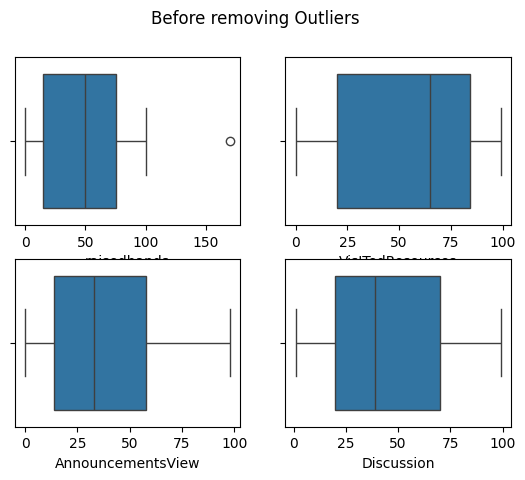

In [23]:
 fig, axes = plt.subplots(2,2)
 fig.suptitle('Before removing Outliers')
 sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
 sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
 sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
 sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
 plt.show()

Highest allowed in variable: raisedhands 165.0
lowest allowed in variable: raisedhands -75.0
Total outliers in: raisedhands : 1
Outliers : 
 1
                                    28
gender                               M
NationalITy                         KW
PlaceofBirth                    KuwaIT
StageID                   MiddleSchool
GradeID                           G-08
SectionID                            A
Topic                          Science
Semester                             F
Relation                             0
raisedhands                      170.0
VisITedResources                    85
AnnouncementsView                   52
Discussion                          43
ParentAnsweringSurvey              Yes
ParentschoolSatisfaction          Good
StudentAbsenceDays             Under-7
Class                                M


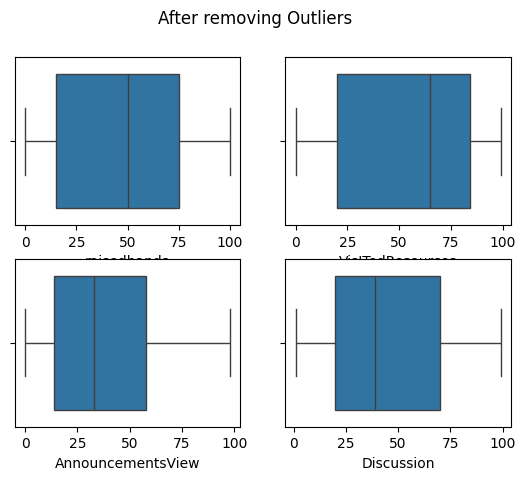

In [24]:
 df = DetectOutlier(df, 'raisedhands')
 fig, axes = plt.subplots(2,2)
 fig.suptitle('After removing Outliers')
 sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
 sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
 sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
 sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
 plt.show()

In [25]:
 print('---------------- Data Skew Values before Yeo John Transformation ----------------------')
 print('raisedhands: ', df['raisedhands'].skew())
 print('VisITedResources: ', df['VisITedResources'].skew())
 print('AnnouncementsView: ', df['AnnouncementsView'].skew())
 print('Discussion: ', df['Discussion'].skew())

---------------- Data Skew Values before Yeo John Transformation ----------------------
raisedhands:  0.028374079559687623
VisITedResources:  -0.3388404568312024
AnnouncementsView:  0.4021955128761278
Discussion:  0.3621541732143617


---------------- Data Skew Values after Yeo John Transformation ----------------------
AnnouncementsView: -0.1800377395845211
Discussion -0.13328782723929383


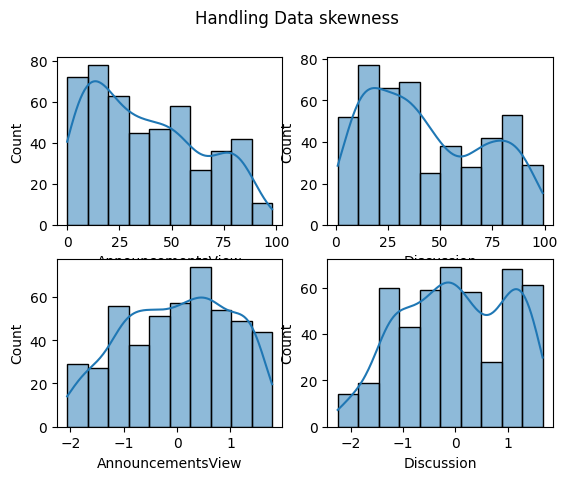

In [26]:
fig,axes=plt.subplots(2,2)
fig.suptitle('Handling Data skewness')
sns.histplot(ax=axes[0,0],data=df['AnnouncementsView'],kde=True)
sns.histplot(ax=axes[0,1],data=df['Discussion'],kde=True)
from sklearn.preprocessing import PowerTransformer
yeojohnTr=PowerTransformer(standardize=True)
df['AnnouncementsView']=yeojohnTr.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))
df['Discussion']=yeojohnTr.fit_transform(df['Discussion'].values.reshape(-1,1))
print('---------------- Data Skew Values after Yeo John Transformation ----------------------')
print('AnnouncementsView:',df['AnnouncementsView'].skew())
print('Discussion',df['Discussion'].skew())
sns.histplot(ax=axes[1,0],data=df['AnnouncementsView'],kde=True)
sns.histplot(ax=axes[1,1],data=df['Discussion'],kde=True)
plt.show()
             